In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
'''
images = get_image_files(photos)
for i in tqdm(images):
    try:
        im = open_image(i)
        im.resize(500)
        im.save(path/'personal-photos-resized'/i.name)
    except:
        continue
''';

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate
from tqdm import tqdm_notebook as tqdm

In [4]:
path = Path('D:\Datasets\whatsapp-important-not-important')
train_path = path/'train'

In [5]:
train_path.ls()

[WindowsPath('D:/Datasets/whatsapp-important-not-important/train/models'),
 WindowsPath('D:/Datasets/whatsapp-important-not-important/train/personal-photos'),
 WindowsPath('D:/Datasets/whatsapp-important-not-important/train/reddit-memes-dataset'),
 WindowsPath('D:/Datasets/whatsapp-important-not-important/train/whatsapp-images')]

In [8]:
photos = train_path/'personal-photos'
memes = train_path/'reddit-memes-dataset'

In [6]:
data = ImageDataBunch.from_folder(train_path, valid_pct=.2, test='whatsapp-images', ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)

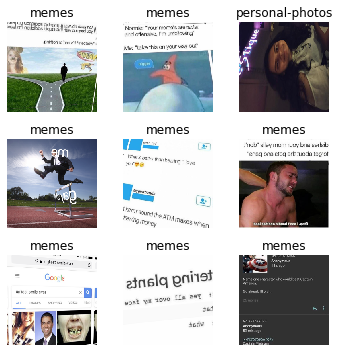

In [7]:
data.show_batch(rows=3, figsize=(5,5))

In [8]:
assert(data.c == len(data.classes))

# Resnet-34 as Baseline

In [9]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [17]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.250953,0.148126,0.054665,02:28
1,0.181788,0.139467,0.049953,02:29
2,0.122856,0.114376,0.042413,02:31


In [18]:
learn.save('resnet34-4.2', return_path=True)

WindowsPath('D:/Datasets/whatsapp-important-not-important/train/models/resnet34-4.2.pth')

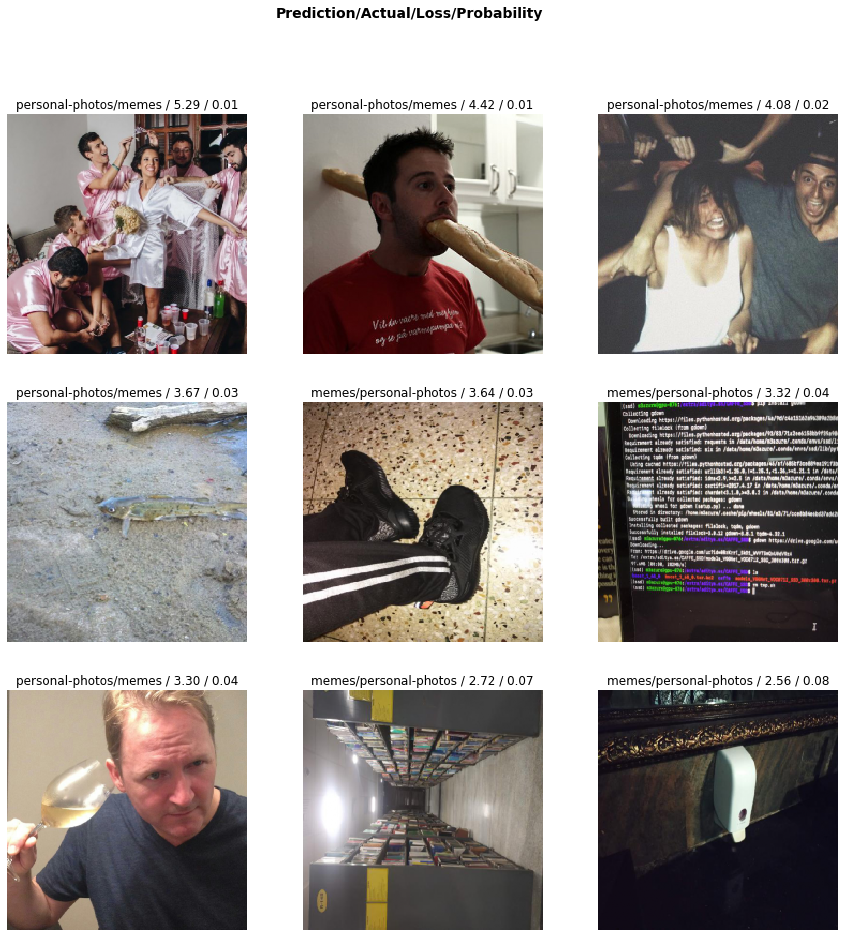

In [31]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

In [10]:
learn.load('resnet34-3.2');

In [22]:
# learn.freeze()
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


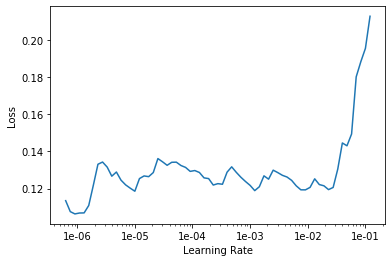

In [24]:
learn.recorder.plot()

In [25]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(3e-6, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.116313,0.108529,0.044298,02:28
1,0.093709,0.083046,0.032988,02:32


In [26]:
learn.save('resnet34-3.2')

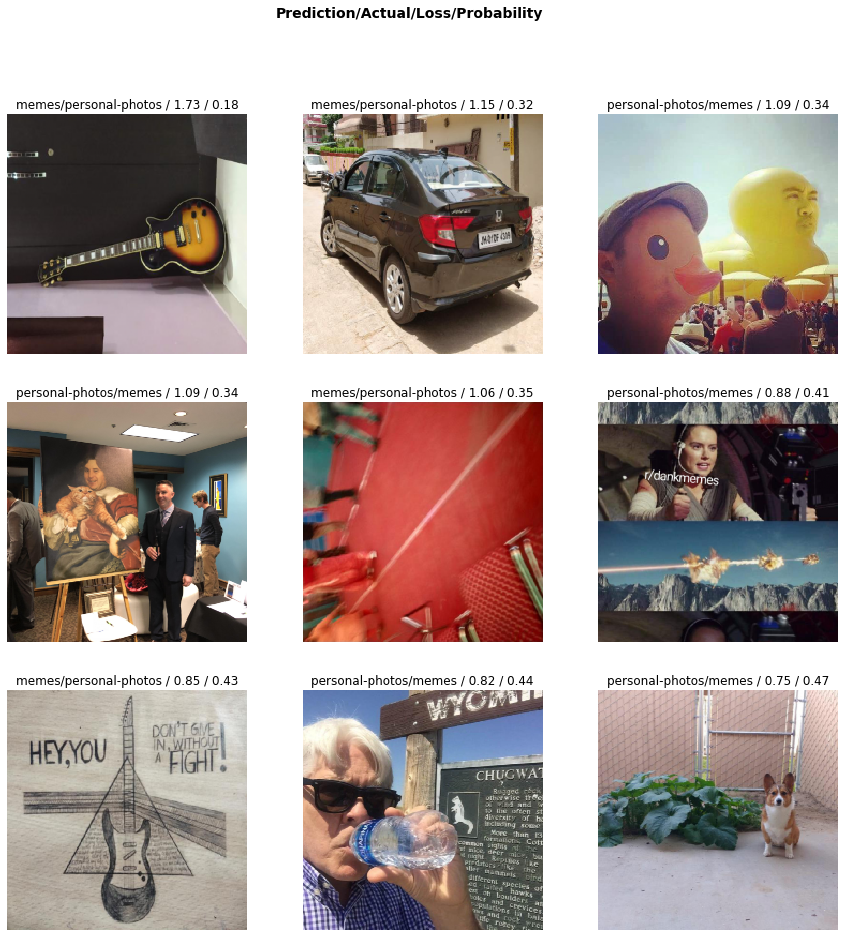

In [56]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

## Resnet-50

In [57]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [34]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.243504,0.134324,0.048068,02:34
1,0.120469,0.119941,0.041470,02:37
2,0.081428,0.090358,0.033930,02:41


In [35]:
learn.save('resnet50-3.3')

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


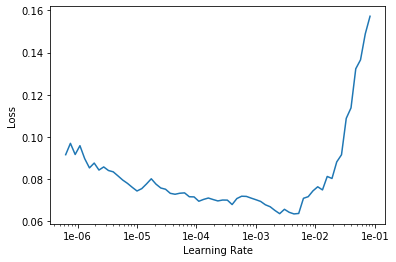

In [37]:
learn.recorder.plot()

In [40]:
# learn.load('resnet50-3.3');

In [41]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.082963,0.081401,0.031103,02:46
1,0.059809,0.076526,0.028275,02:48


In [42]:
learn.save('resnet50-2.8')

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


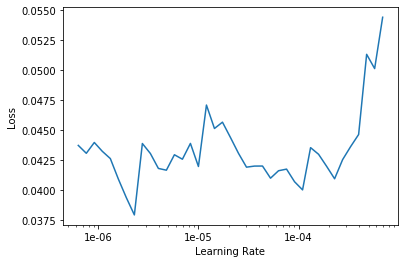

In [45]:
learn.recorder.plot()

In [46]:
learn.fit_one_cycle(2, max_lr=slice(3e-8, 3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.053296,0.079615,0.026390,02:36
1,0.054009,0.080602,0.026390,02:44


In [47]:
learn.save('resnet50-2.6');

In [58]:
learn.load('resnet50-2.6');

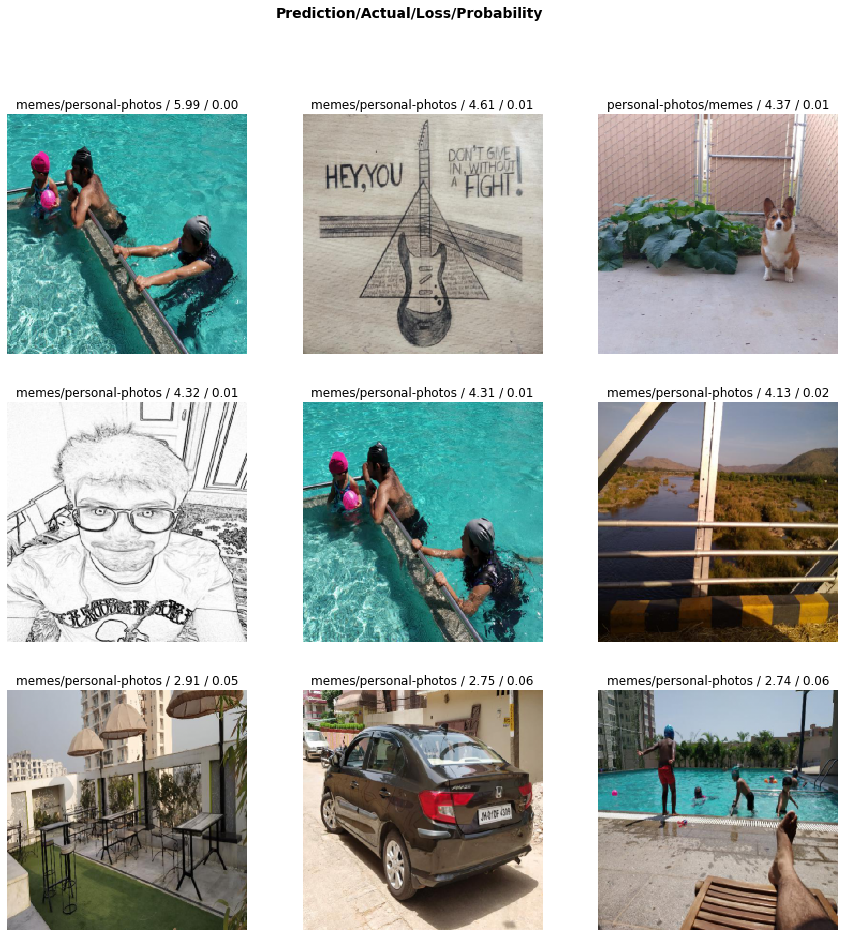

In [59]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,15))

# Now, I shall save them to folders!

In [61]:
test_path = path/'train'/'whatsapp-images'
test_ims = get_image_files(test_path); len(test_ims)

10791

In [62]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.load('resnet34-3.2');
preds34 = {}
for i in tqdm(test_ims):
    try:
        im = open_image(i)
        pred_class,pred_idx,outputs = learn.predict(im)
        preds34[i.name] = pred_class
    except:
        continue

In [63]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)
learn.load('resnet50-2.8');
preds50 = {}
for i in tqdm(test_ims):
    try:
        im = open_image(i)
        pred_class,pred_idx,outputs = learn.predict(im)
        preds50[i.name] = pred_class
    except:
        continue

In [65]:
import os

In [70]:
os.mkdir(path/'resnet34'/'memes')
os.mkdir(path/'resnet34'/'personal-photos')
for i in tqdm(preds34):
    shutil.copy(test_path/i, path/'resnet34'/str(preds34[i]))

In [72]:
os.mkdir(path/'resnet50'/'memes')
os.mkdir(path/'resnet50'/'personal-photos')
for i in tqdm(preds50):
    shutil.copy(test_path/i, path/'resnet50'/str(preds50[i]))